In [75]:
import numpy as np
import pandas as pd
np.set_printoptions(threshold=20000)
pd.options.display.max_columns = None

from itertools import product

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
import seaborn as sns
sns.set()

import re

# Vista rápida

In [8]:
inai = pd.read_parquet('../data/inai.parquet')
inai.sample(5)

,folio,fecha_solicitud,estatus,medio_entrada,tipo_solicitud,descripcion,otros,archivo_adjunto,medio_entrega,fecha_limite,respuesta,texto_respuesta,archivo_respuesta,fecha_respuesta,pais,estado,municipio,codigo_postal,sector,año,clave_dependencia,dependencia
1394409,6025900000417,2017-02-07 12:32:03,En proceso,Electrónica,Información Pública,¿Cuál es el monto que reciben de dinero públic...,,nan,Entrega por Internet en la PNT,2017-03-07,Sin respuesta,nan,nan,2017-02-07,México,Ciudad de México,MIGUEL HIDALGO,6030.0,Ninguno,2017,60259,Sindicato Nacional Independiente de Trabajador...
743303,63700483116,2016-09-28 01:54:00,Terminada,Electrónica,Datos Personales,DESCRIPCIÓN SOLICITUD,OTROS DATOS,ADJUNTO SOLICITUD,Copia Certificada,2016-10-17,Entrega de información en medio electrónico,TEXTO RESPUESTA,ADJUNTO,2016-10-17,México,Distrito Federal,IZTAPALAPA,9890.0,Aportaciones a Seguridad Social,2016,00637,Instituto de Seguridad y Servicios Sociales de...
1279049,1868100015717,2017-07-13 17:34:58,Terminada,Electrónica,Información Pública,Solicito el puesto o cargo que desempeña el C....,nan,nan,Entrega por Internet en la PNT,2017-08-24,No es de competencia de la unidad de enlace,@Estimado Ciudadano en atención a la Solicitu...,nan,2017-07-31,México,Nuevo León,GALEANA,67850.0,Ninguno,2017,18681,Contrato especifico abierto para la construcci...
364388,1100279412,2012-07-02 18:38:24,Terminada,Electrónica,Información Pública,Convenios de apoyo extraordinario otorgados al...,Favor de incluir la documentación soporte est...,nan,Entrega por Internet en el INFOMEX,2012-09-11,Entrega de información en medio electrónico,nan,https://www.infomex.org.mx/gobiernofederal/mod...,2012-08-27,México,Distrito Federal,BENITO JUAREZ,3103.0,Educación Pública,2012,00011,Secretaría de Educación Pública
770199,2116000007617,2017-06-13 17:50:45,Terminada,Manual,Información Pública,hola buenas tardes escribia para saber si me...,nan,nan,Otro Medio,2017-07-11,La información está disponible públicamente,Se adjunta respuesta. UNIDAD DE TRANSPARENC...,https://www.infomex.org.mx/gobiernofederal/mod...,2017-06-16,México,Ciudad de México,ALVARO OBREGON,0.0,Turismo,2017,21160,Fondo Nacional de Fomento al Turismo


In [15]:
for col in ['fecha_solicitud', 'fecha_respuesta', 'fecha_limite']:
    inai[col] = pd.to_datetime(inai[col])

### `estatus`

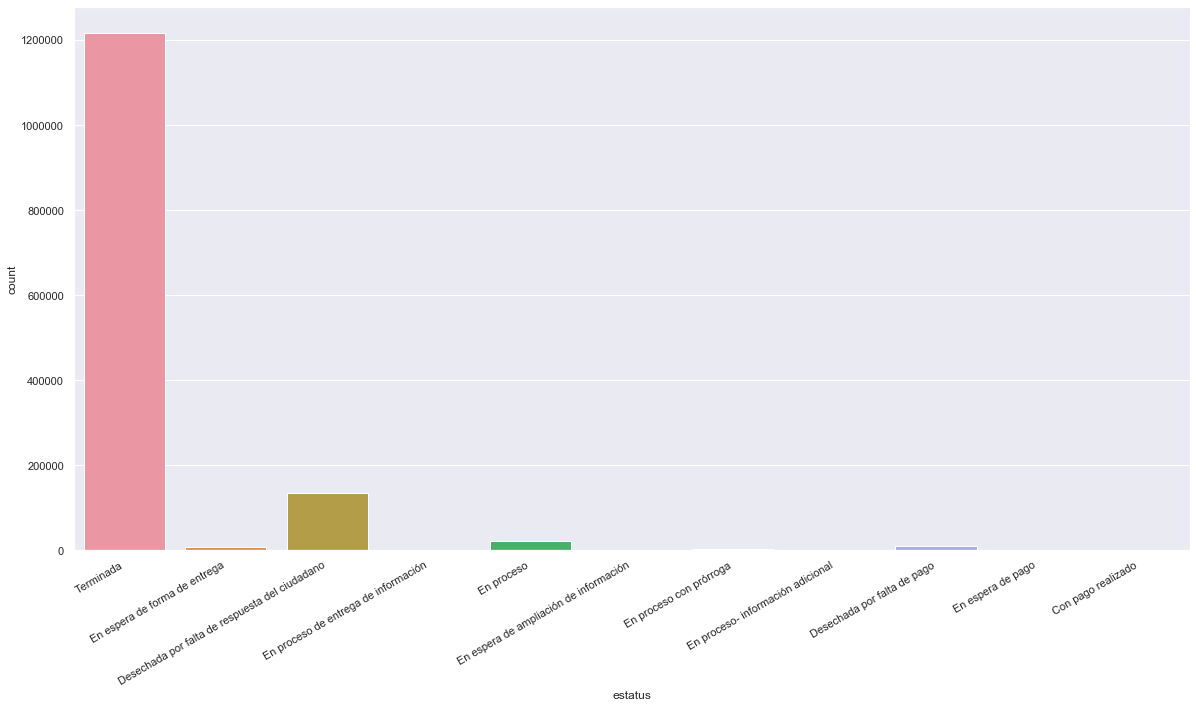

In [8]:
g = sns.countplot(inai.estatus)
g = g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')

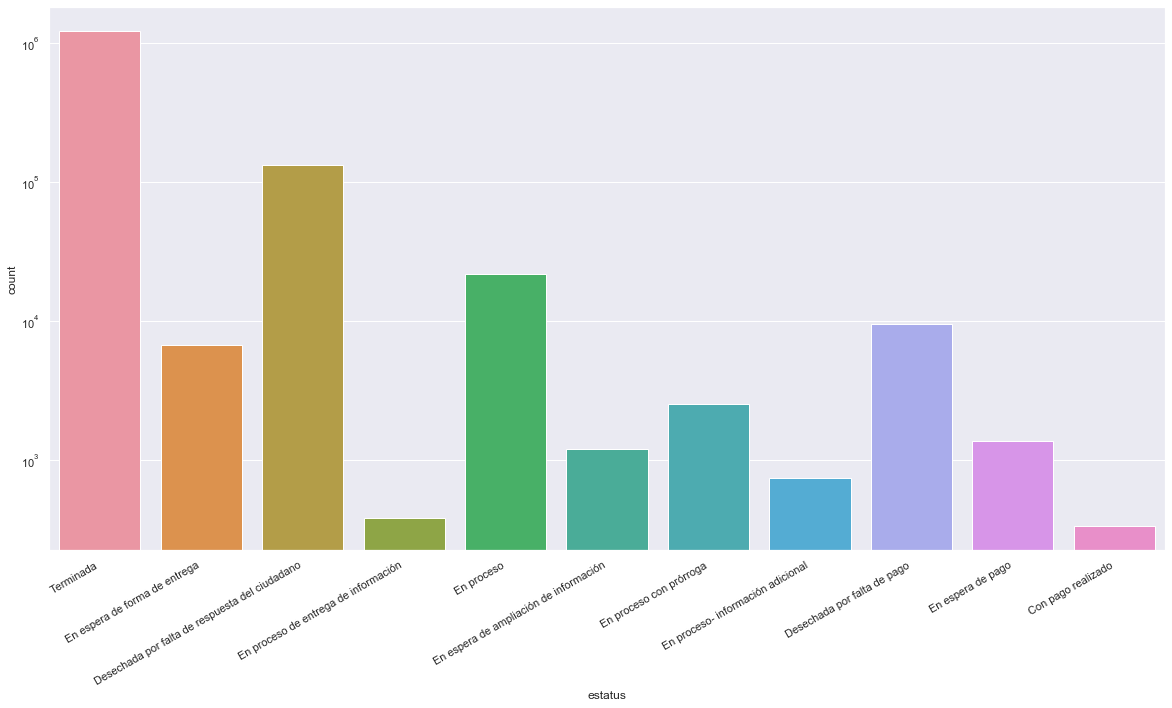

In [9]:
g = sns.countplot(inai.estatus)
g.set_yscale('log')
g = g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')

### `medio_entrada`

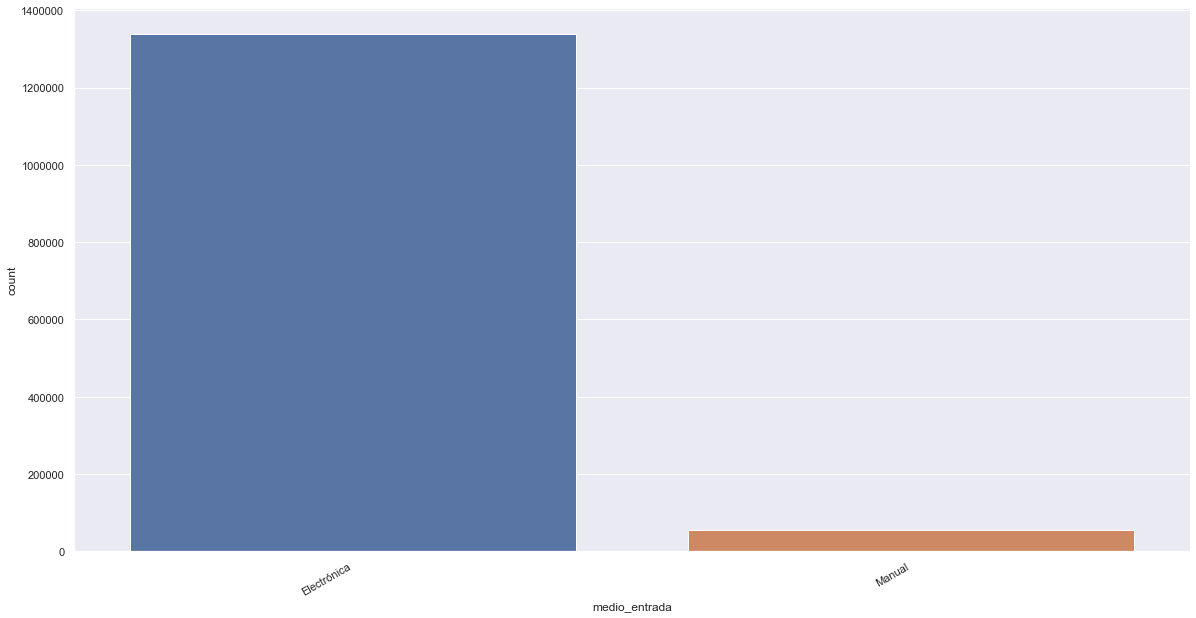

In [10]:
g = sns.countplot(inai.medio_entrada)
g = g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')

### `tipo_solicitud`

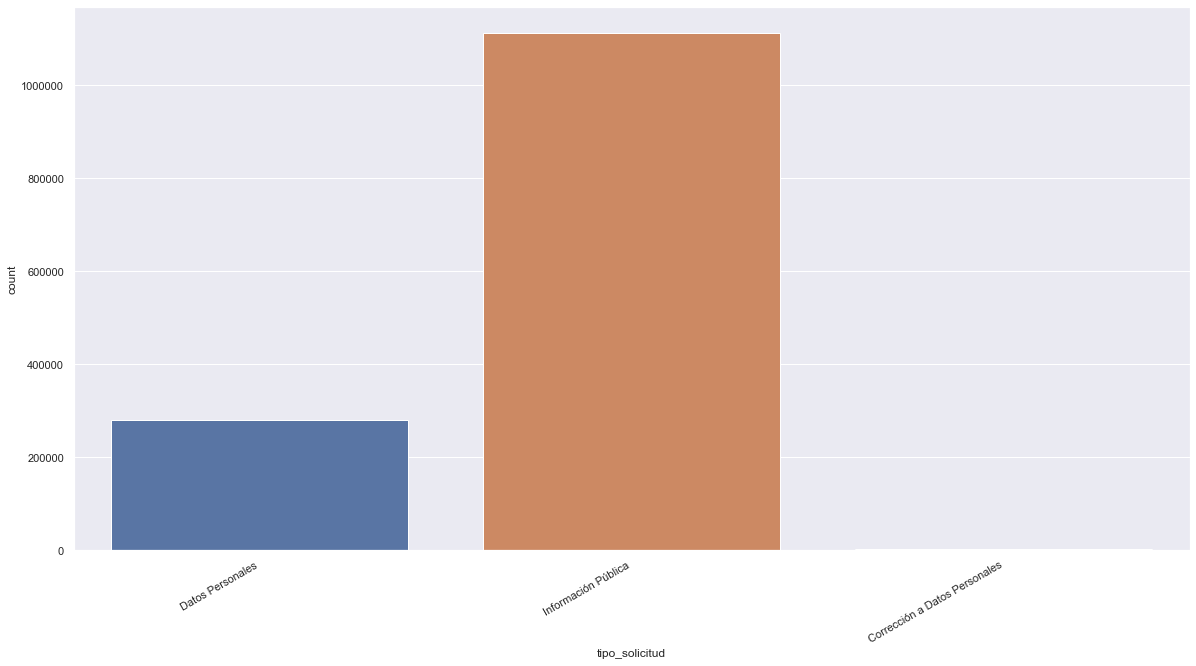

In [11]:
g = sns.countplot(inai.tipo_solicitud)
g = g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')

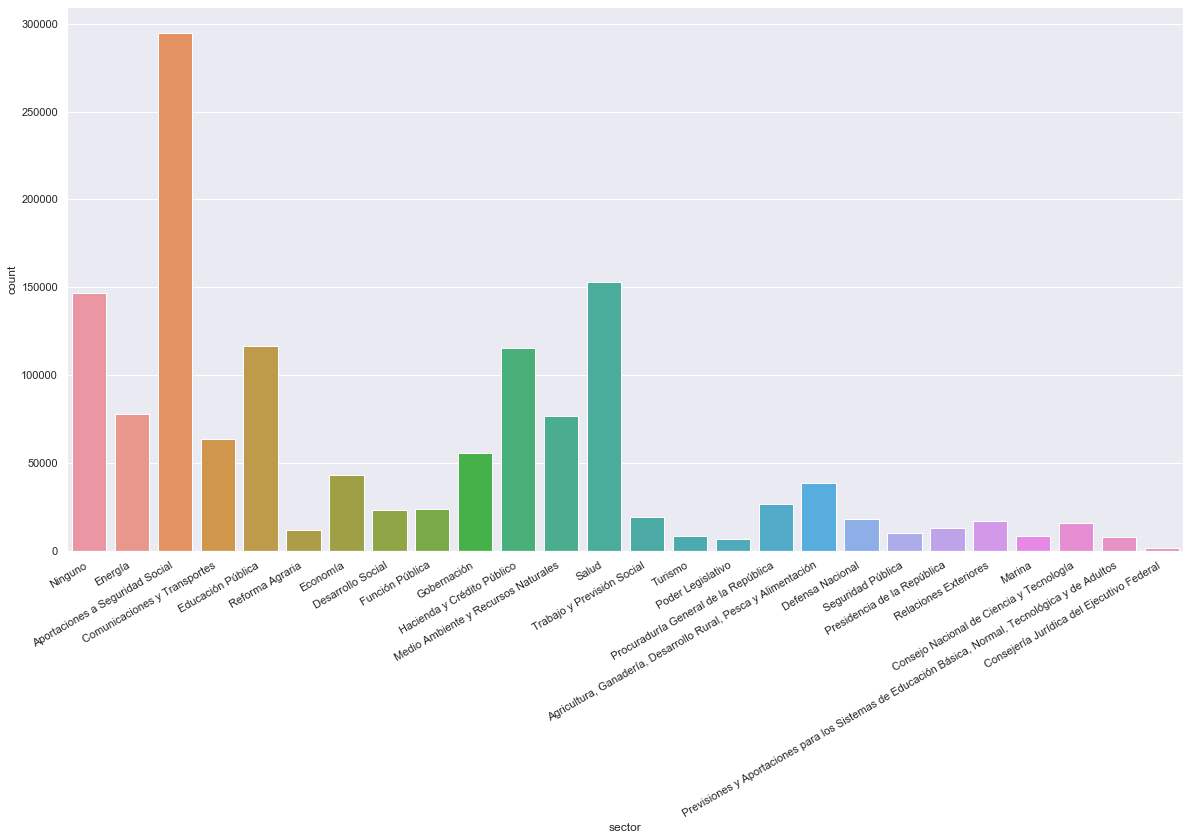

In [84]:
g = sns.countplot(inai.sector)
g = g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')

### `descripción`

In [12]:
inai.descripcion.sample(5)

242121                                DESCRIPCIÓN SOLICITUD
341773    INFORMACION QUE RECOREGE PERSONALMENTE EN CUAN...
356740    gasto publico ejercido en educación básica  me...
79203                                 DESCRIPCIÓN SOLICITUD
761449                                DESCRIPCIÓN SOLICITUD
Name: descripcion, dtype: object

Es la solicitud. Textimnear.

### `otros`

In [13]:
inai.otros.sample(10)

752592                                                      
1230660                                          OTROS DATOS
1344340                                                  nan
1205732    Inmovilización de cuentas bancarias para garan...
356720                                           OTROS DATOS
1003507                                                  nan
328212                                                      
1325513                        MI CLAVE DE EMPLEADO FUE 3703
806609                        razones   negligencias médicas
191058                                                   nan
Name: otros, dtype: object

No vale la pena, muy *ad hoc*.

### `archivo_adjunto`

In [16]:
inai.loc[inai.archivo_adjunto!='nan', 'archivo_adjunto'].sample(10)

539256     https://www.infomex.org.mx/gobiernofederal/mod...
1368496    https://www.infomex.org.mx/gobiernofederal/mod...
298837                                     ADJUNTO SOLICITUD
501830     https://www.infomex.org.mx/gobiernofederal/mod...
841103     https://www.infomex.org.mx/gobiernofederal/mod...
741215                                     ADJUNTO SOLICITUD
644834                                     ADJUNTO SOLICITUD
122412                                     ADJUNTO SOLICITUD
971491                                     ADJUNTO SOLICITUD
1074105    https://www.infomex.org.mx/gobiernofederal/mod...
Name: archivo_adjunto, dtype: object

Adjuntos por el gobierno. En cualquier caso, si no son `nan` pueden ayudar a encontrar respuesta positiva o lo que signifique ADJUNTO SOLICITUD.

### `medio_entrega`

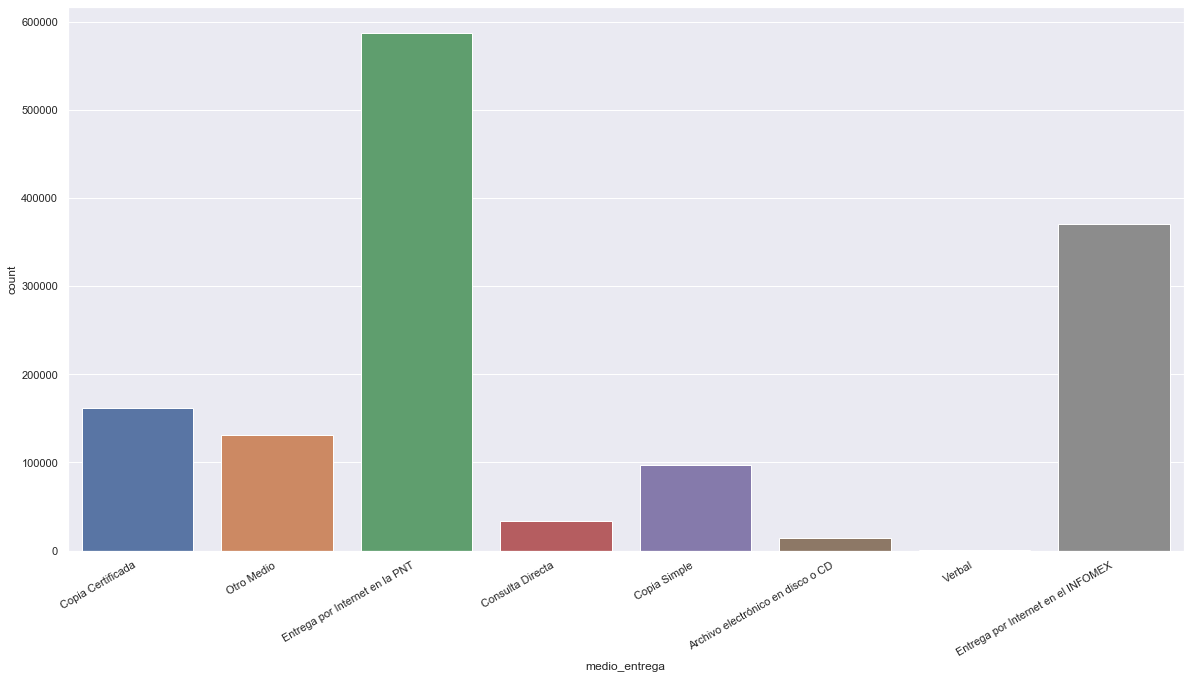

In [17]:
g = sns.countplot(inai.medio_entrega)
g = g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')

### `respuesta`

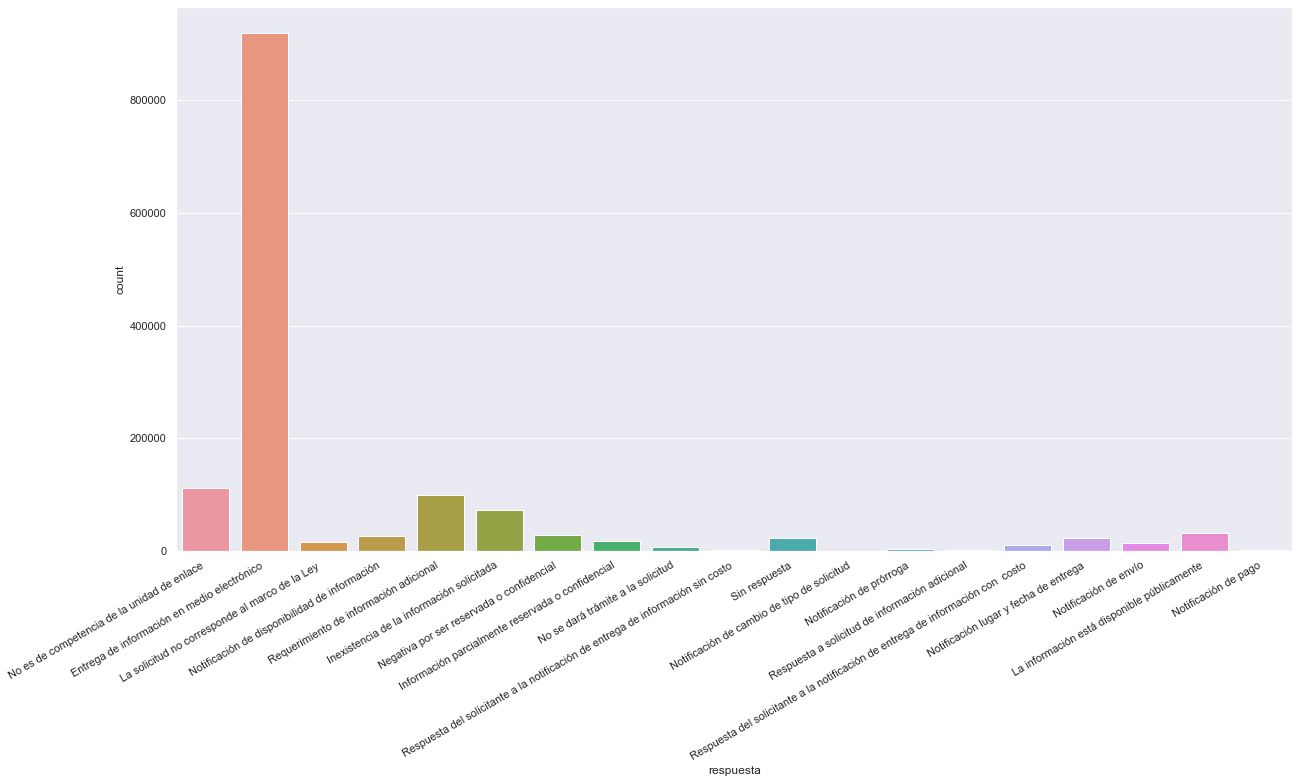

In [18]:
g = sns.countplot(inai.respuesta)
g = g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')

[Text(0, 0, 'No es de competencia de la unidad de enlace'),
 Text(0, 0, 'Entrega de información en medio electrónico'),
 Text(0, 0, 'La solicitud no corresponde al marco de la Ley '),
 Text(0, 0, 'Notificación de disponibilidad de información'),
 Text(0, 0, 'Requerimiento de información adicional'),
 Text(0, 0, 'Inexistencia de la información solicitada'),
 Text(0, 0, 'Negativa por ser reservada o confidencial'),
 Text(0, 0, 'Información parcialmente reservada o confidencial'),
 Text(0, 0, 'No se dará trámite a la solicitud'),
 Text(0, 0, 'Respuesta del solicitante a la notificación de entrega de información sin costo'),
 Text(0, 0, 'Sin respuesta'),
 Text(0, 0, 'Notificación de cambio de tipo de solicitud'),
 Text(0, 0, 'Notificación de prórroga'),
 Text(0, 0, 'Respuesta a solicitud de información adicional'),
 Text(0, 0, 'Respuesta del solicitante a la notificación de entrega de información con  costo'),
 Text(0, 0, 'Notificación lugar y fecha de entrega'),
 Text(0, 0, 'Notificación 

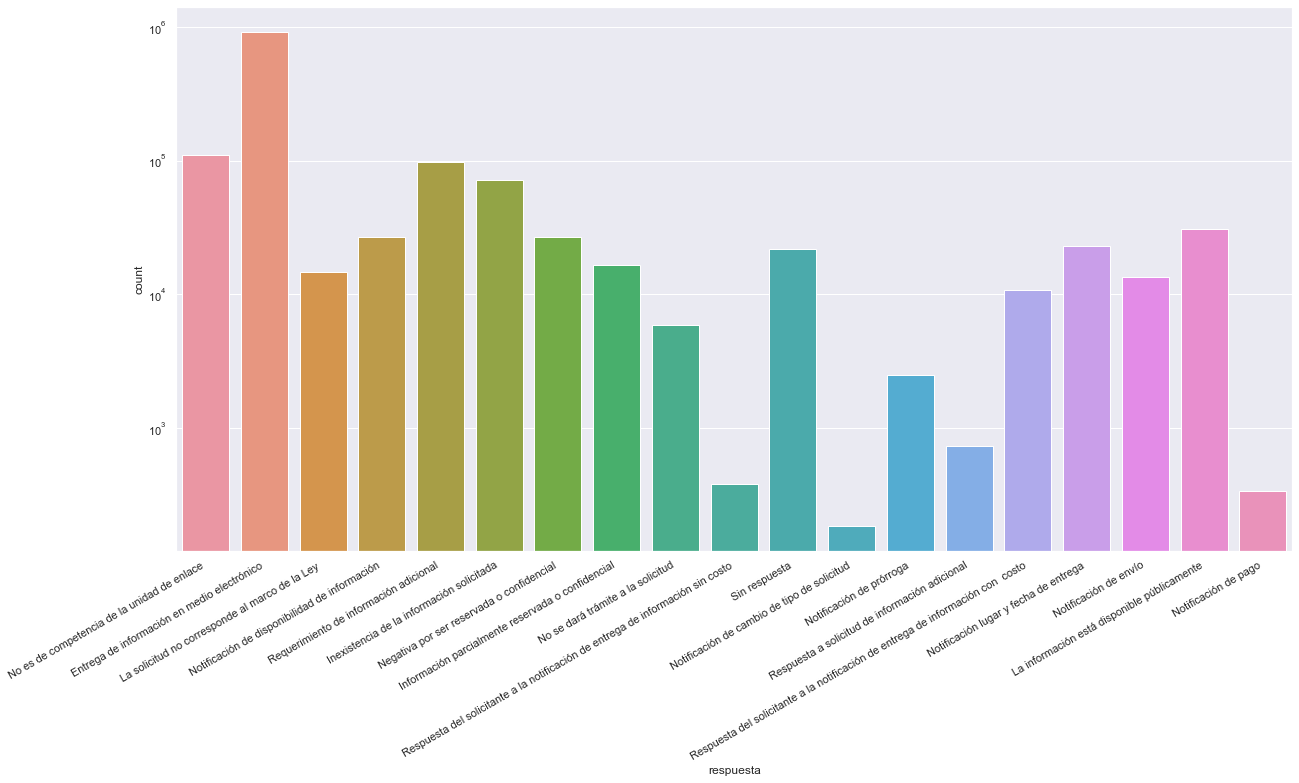

In [19]:
g = sns.countplot(inai.respuesta)
g.set_yscale('log')
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right')

requerimiento de información adicional: la ciudadana no dio suficiente información para satisfacer el query.

respuesta del solic... : estos están en el proceso entre "ah, necesitamos esto de ti" y que se los de. Seguramente si no lo contesta, se va a deshechado por falta de pago en estatus.

###  `archivo_respuesta`

In [20]:
inai.loc[inai.archivo_respuesta=='nan', 'medio_entrega'].sample(10)

522355                             Otro Medio
714962                             Otro Medio
868251         Entrega por Internet en la PNT
1095442        Entrega por Internet en la PNT
881476         Entrega por Internet en la PNT
360705                           Copia Simple
393218     Entrega por Internet en el INFOMEX
1262801        Entrega por Internet en la PNT
916551         Entrega por Internet en la PNT
1280217    Entrega por Internet en el INFOMEX
Name: medio_entrega, dtype: object

## Un poquillo de tiempo

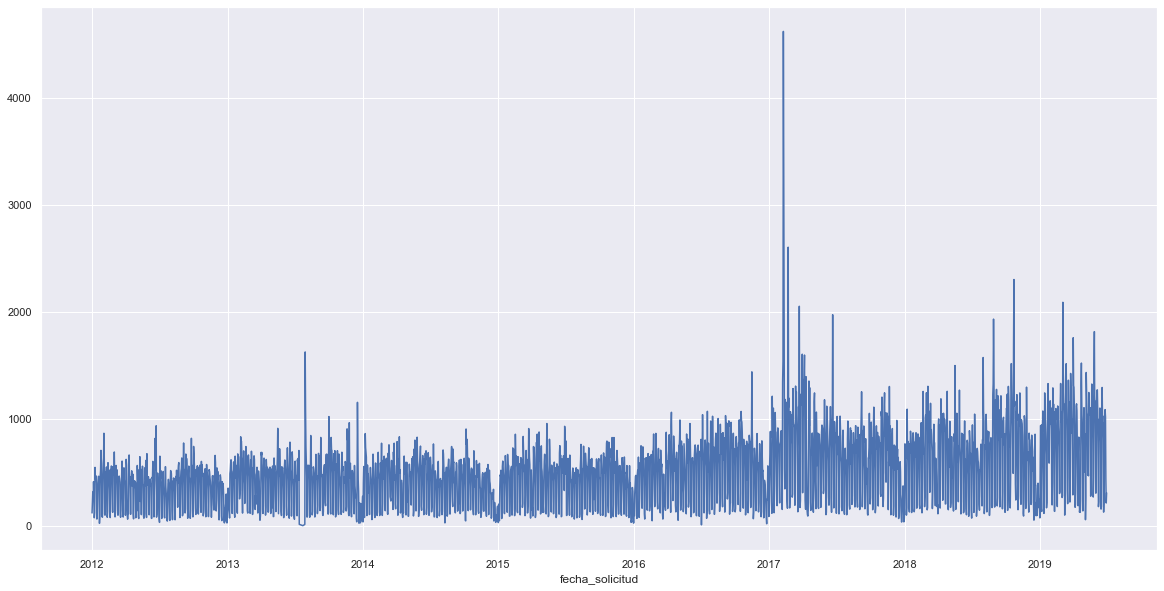

In [46]:
tseries = inai.groupby('fecha_solicitud').size()
sns.lineplot(tseries.index, tseries.values)

In [47]:
tseries[tseries.values > 3000]

fecha_solicitud
2017-02-08    4620
2017-02-09    3464
dtype: int64

In [20]:
inai['semana_solicitud'] = inai.fecha_solicitud.dt.week
inai['por_semana_sol'] = inai.año.astype(str) + '-' + inai.semana_solicitud.astype(str)
inai['mes_solicitud'] = inai.fecha_solicitud.dt.month
inai['por_mes_sol'] = inai.año.astype(str) + '-' + inai.mes_solicitud.astype(str)

In [67]:
todos_meses = []
for year in range(2012, 2020):
    y = str(year)
    for month in range(1, 13):
        m = str(month)
        todos_meses.append(y+'-'+m)

In [61]:
respuestas = inai.respuesta.unique()

In [62]:
from itertools import product

In [68]:
ii = pd.DataFrame(list(product(respuestas, todos_meses)))

In [71]:
ii.columns = ['respuesta', 'por_mes_sol']

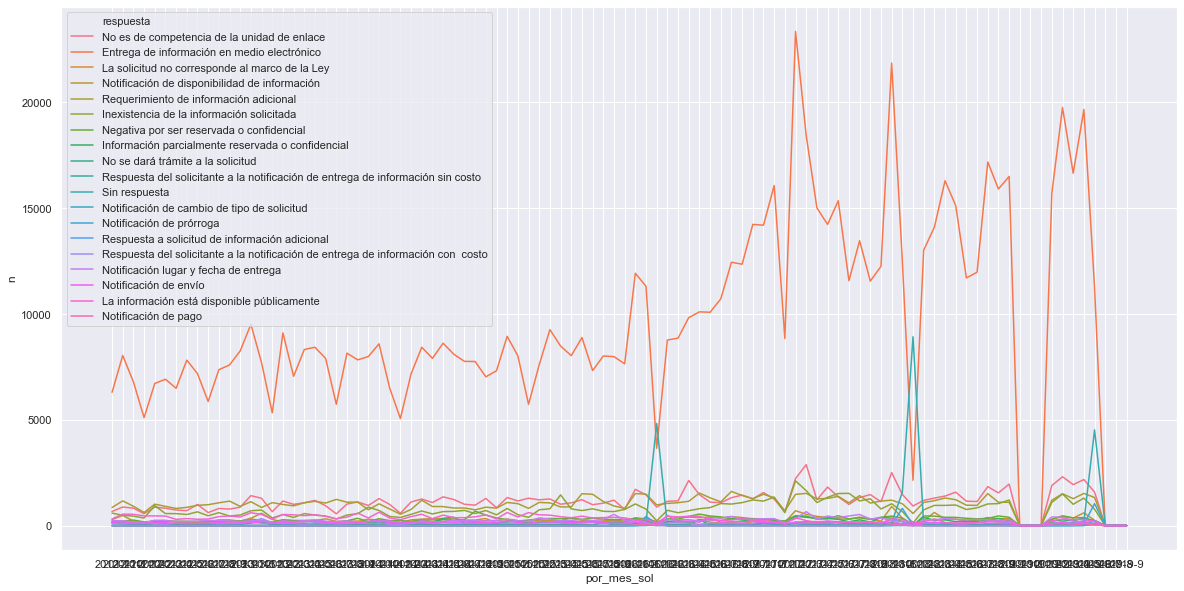

In [81]:
tseries = inai.groupby(['por_mes_sol', 'respuesta']).size().to_frame('n').reset_index()
tseries = ii.merge(tseries, how='left').fillna(0)
sns.lineplot(tseries.por_mes_sol, tseries.n, hue=tseries.respuesta)

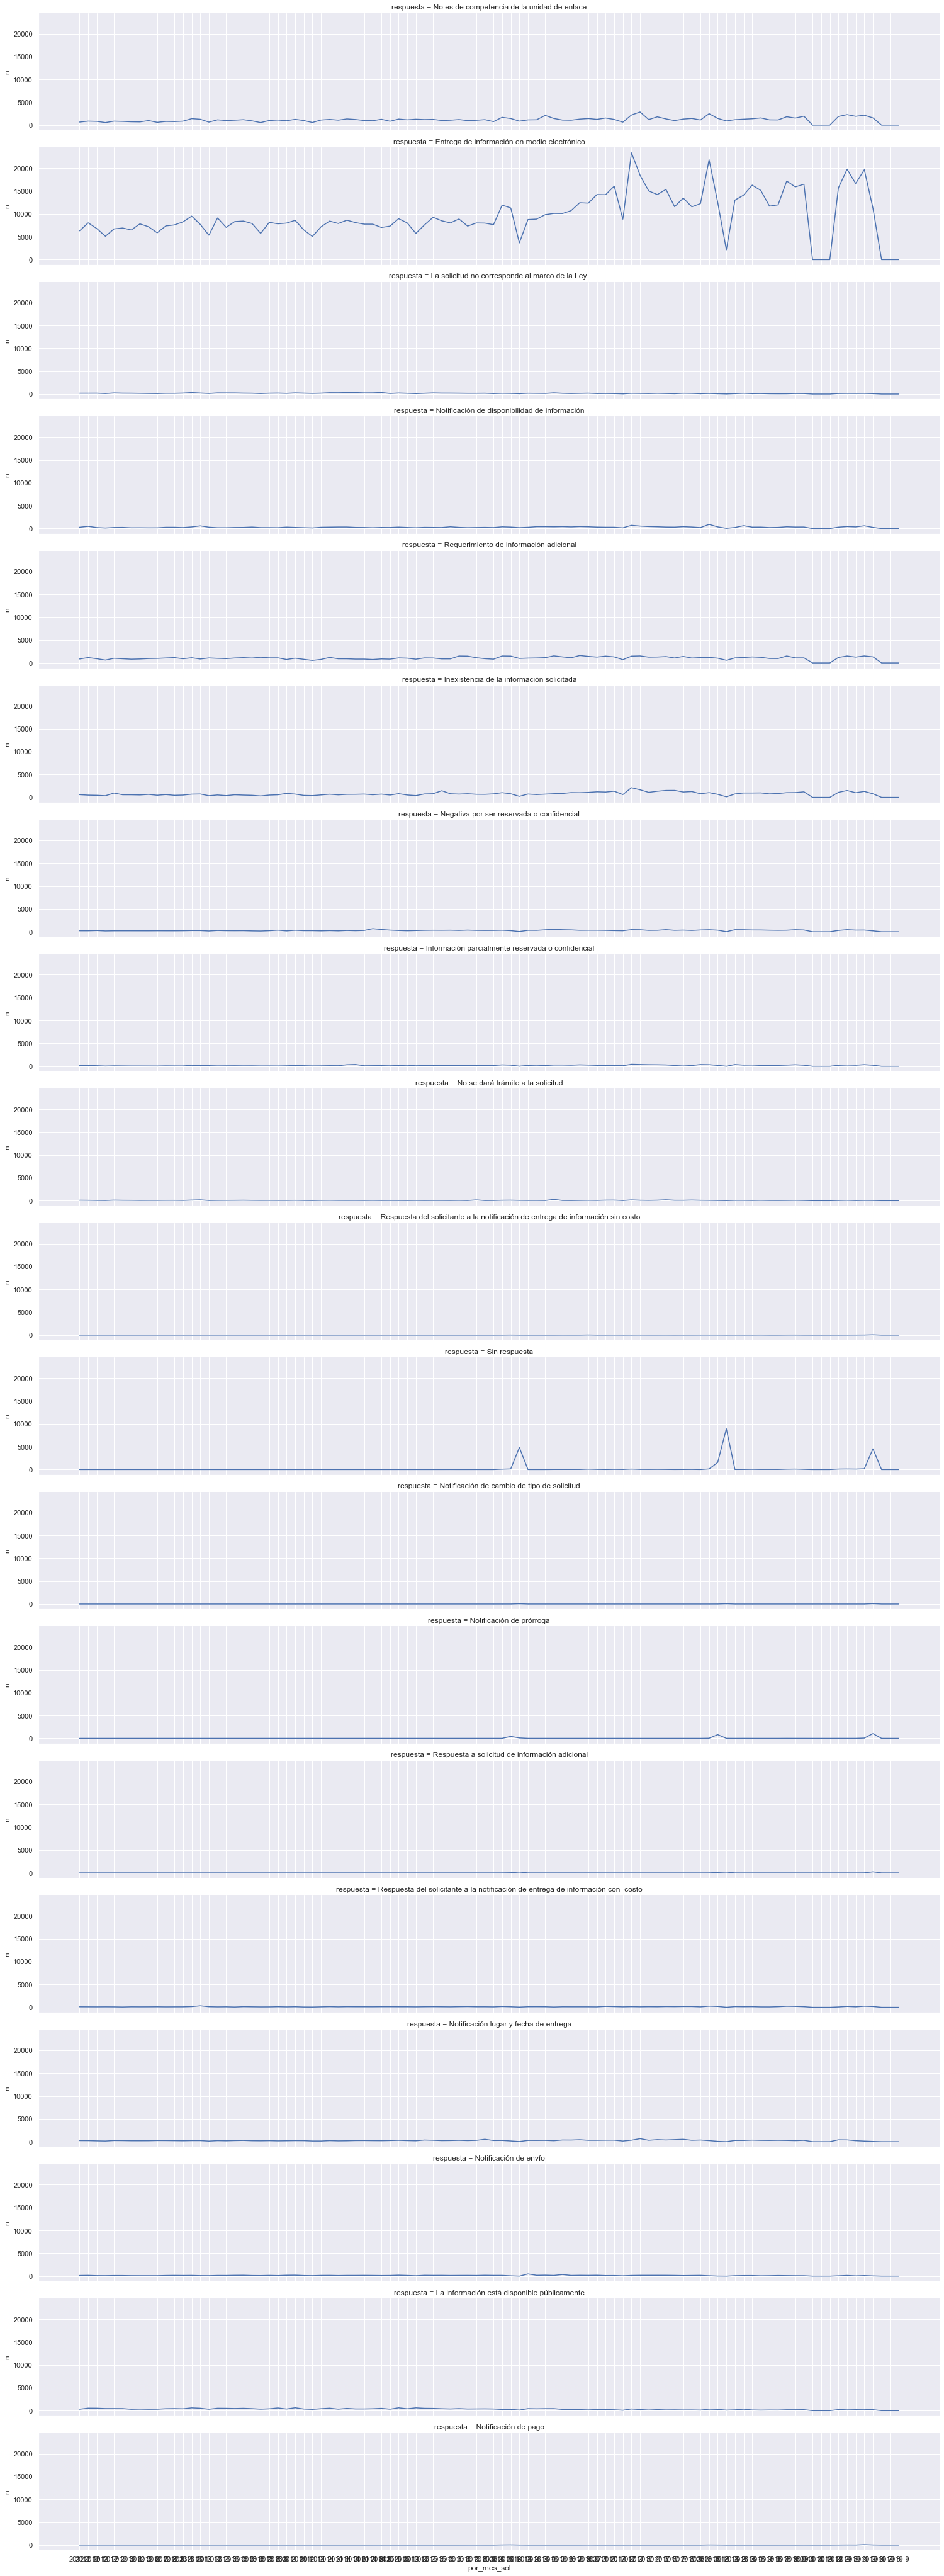

In [83]:
sns.relplot(x='por_mes_sol', y='n', 
            row='respuesta', 
            kind='line',
            height = 3,
            aspect = 7,
            data=tseries)

In [85]:
iii = pd.DataFrame(product(todos_meses, inai.sector.unique()))

In [87]:
iii.columns = ['todos-meses', 'sector']

In [93]:
tseries = inai.groupby(['por_mes_sol', 'sector']).size().to_frame('n').reset_index()
tseries = iii.merge(tseries, how='left')

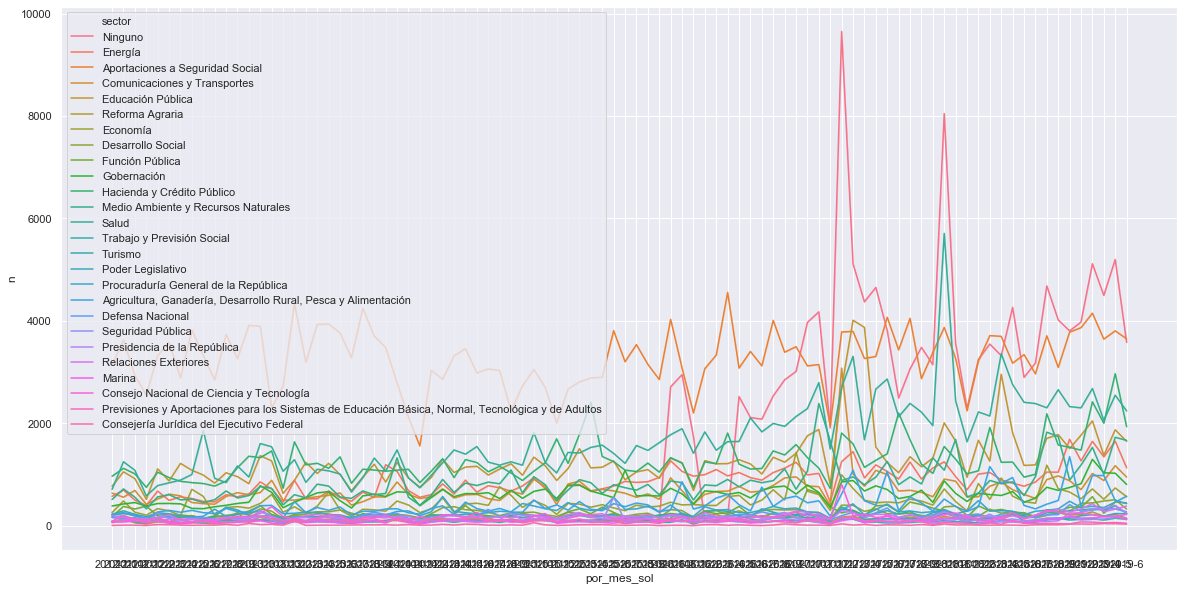

In [94]:
sns.lineplot(tseries.por_mes_sol, tseries.n, hue=tseries.sector)

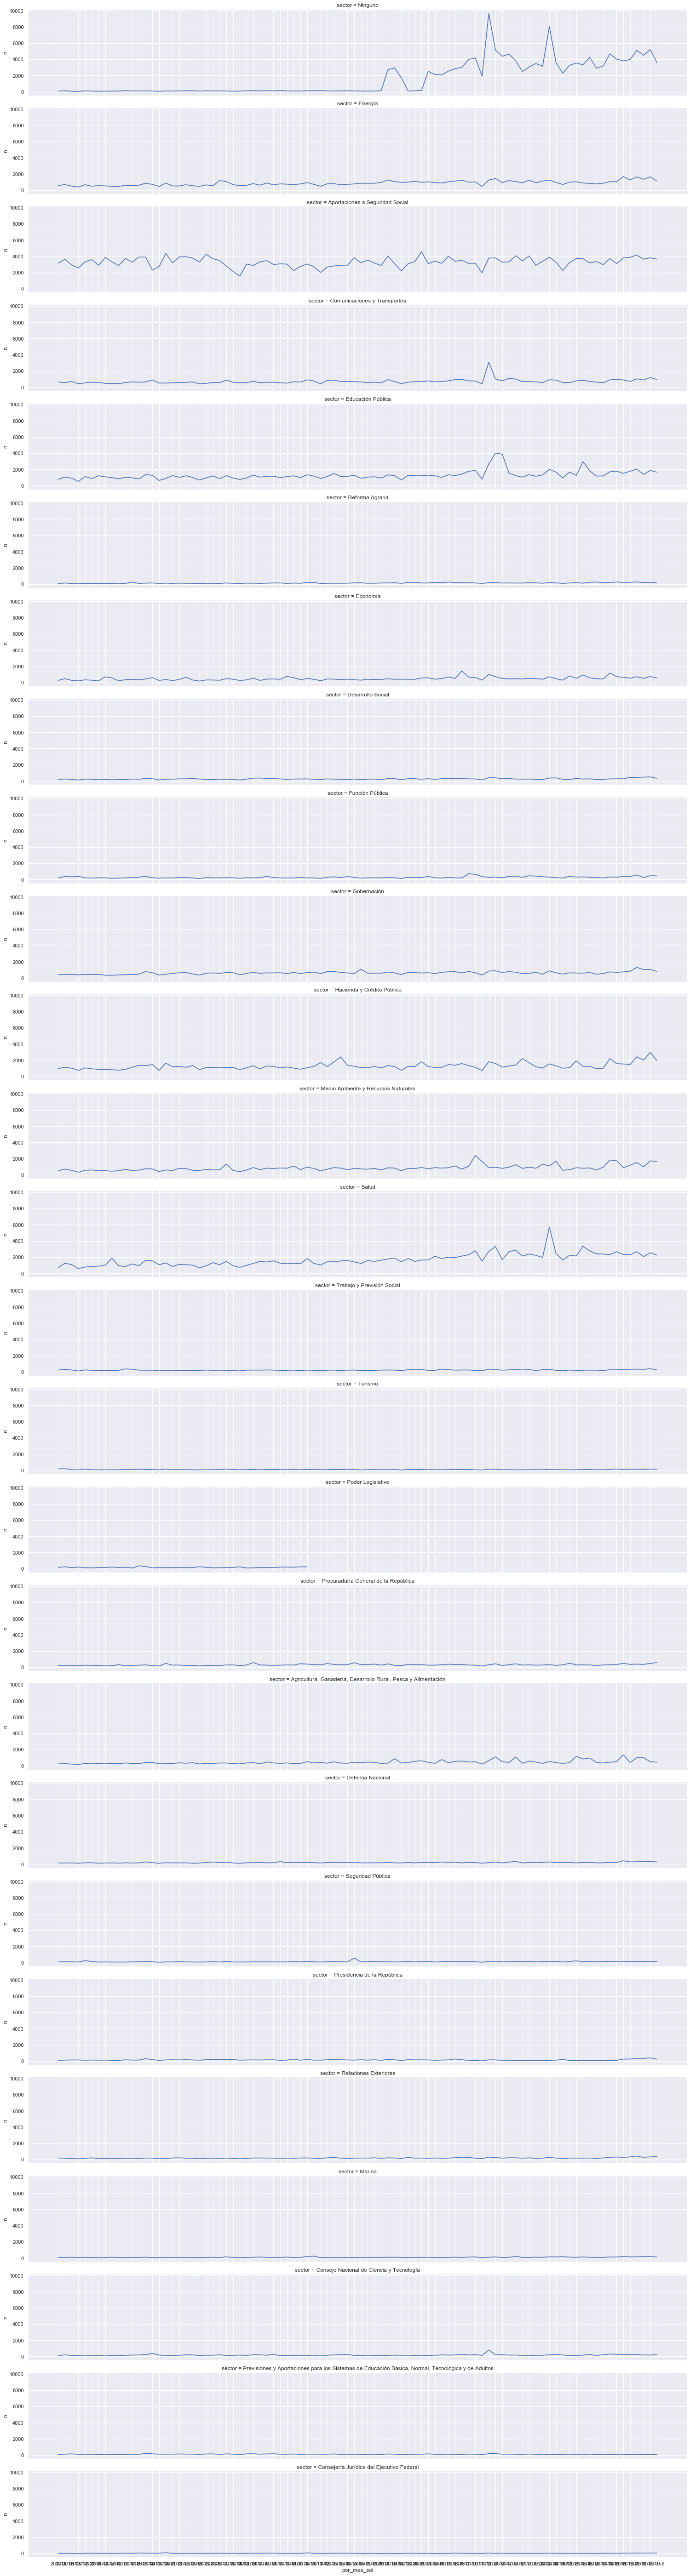

In [95]:
sns.relplot(x='por_mes_sol', y='n', 
            row='sector', 
            kind='line',
            height = 3,
            aspect = 7,
            data=tseries)

> Hacer análisis de punto de cambio.

## Eficiencia

In [96]:
inai.columns

Index(['folio', 'fecha_solicitud', 'estatus', 'medio_entrada',
       'tipo_solicitud', 'descripcion', 'otros', 'archivo_adjunto',
       'medio_entrega', 'fecha_limite', 'respuesta', 'texto_respuesta',
       'archivo_respuesta', 'fecha_respuesta', 'pais', 'estado', 'municipio',
       'codigo_postal', 'sector', 'año', 'clave_dependencia', 'dependencia',
       'semana_solicitud', 'por_semana_sol', 'mes_solicitud', 'por_mes_sol'],
      dtype='object')

In [129]:
inai['tiempo_respuesta'] = (inai.fecha_respuesta - inai.fecha_solicitud).dt.days
inai['demora'] = (inai.fecha_respuesta - inai.fecha_limite).dt.days

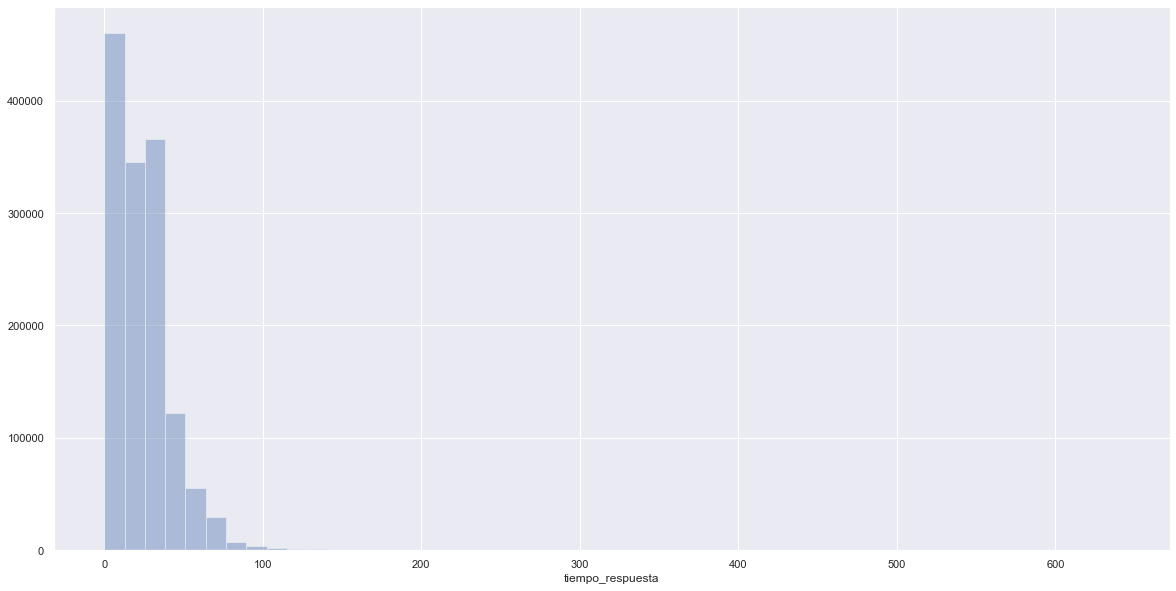

In [134]:
sns.distplot(inai.tiempo_respuesta, kde=False)

In [138]:
inai.sort_values('demora', ascending=False)

,folio,fecha_solicitud,estatus,medio_entrada,tipo_solicitud,descripcion,otros,archivo_adjunto,medio_entrega,fecha_limite,respuesta,texto_respuesta,archivo_respuesta,fecha_respuesta,pais,estado,municipio,codigo_postal,sector,año,clave_dependencia,dependencia,semana_solicitud,por_semana_sol,mes_solicitud,por_mes_sol,tiempo_respuesta,demora
979747,6430000002117,2017-01-10,Terminada,Electrónica,Información Pública,¿Tiene la Universidad Autónoma Metropolitana u...,,https://www.infomex.org.mx/gobiernofederal/mod...,Entrega por Internet en la PNT,2017-02-10,Entrega de información en medio electrónico,nan,https://www.infomex.org.mx/gobiernofederal/mod...,2018-10-11,México,México,CUAUTITLAN IZCALLI,54740.0,Educación Pública,2017,64300,Universidad Autónoma Metropolitana,2,2017-2,1,2017-1,639,608.0
1305467,1010200003312,2012-08-04,Terminada,Electrónica,Información Pública,08/2012 AL FIFOMI: POR MEDIO DE LA PRESENTO ...,ADJUNTO ARCHIVO WORD...,https://www.infomex.org.mx/gobiernofederal/mod...,Entrega por Internet en el INFOMEX,2012-10-05,Entrega de información en medio electrónico,Se anexa en archivo electrónico la respuesta a...,https://www.infomex.org.mx/gobiernofederal/mod...,2014-05-06,México,Nuevo León,MONTERREY,64170.0,Economía,2012,10102,Fideicomiso de Fomento Minero,31,2012-31,8,2012-8,640,578.0
687857,1700156912,2012-08-03,Terminada,Electrónica,Información Pública,08/2012 A LA PROCURADURIA GENERAL DE LA REPUBL...,ADJUNTO ARCHIVO WORD....,https://www.infomex.org.mx/gobiernofederal/mod...,Entrega por Internet en el INFOMEX,2012-10-18,Notificación de envío,Número de Guía:mp556822814<br>Fecha de Envío:0...,https://www.infomex.org.mx/gobiernofederal/mod...,2014-04-28,México,Nuevo León,MONTERREY,64170.0,Procuraduría General de la República,2012,00017,Fiscalía General de la República,31,2012-31,8,2012-8,633,557.0
835831,320000129417,2017-03-27,Terminada,Electrónica,Información Pública,Esta contenida en el archivo de excel anexo,Se incluye archivo de formato excel con las pr...,https://www.infomex.org.mx/gobiernofederal/mod...,Otro Medio,2017-05-11,Entrega de información en medio electrónico,0320000129417-IM Ciudad de México a primero...,https://www.infomex.org.mx/gobiernofederal/mod...,2018-10-01,México,,,NaN,Ninguno,2017,03200,Consejo de la Judicatura Federal,13,2017-13,3,2017-3,553,508.0
979796,6430000007017,2017-02-08,Terminada,Electrónica,Información Pública,Con base en mi derecho a la información solic...,nan,nan,Entrega por Internet en la PNT,2017-03-09,Entrega de información en medio electrónico,nan,https://www.infomex.org.mx/gobiernofederal/mod...,2018-07-17,México,Ciudad de México,CUAUHTEMOC,6000.0,Educación Pública,2017,64300,Universidad Autónoma Metropolitana,6,2017-6,2,2017-2,524,495.0
979741,6430000001517,2017-01-06,Terminada,Electrónica,Información Pública,Solicito copias simples del uso y destino de l...,nan,nan,Entrega por Internet en la PNT,2017-02-03,Entrega de información en medio electrónico,nan,https://www.infomex.org.mx/gobiernofederal/mod...,2018-05-21,México,Ciudad de México,MIGUEL HIDALGO,11510.0,Educación Pública,2017,64300,Universidad Autónoma Metropolitana,1,2017-1,1,2017-1,500,472.0
836481,320000194417,2017-05-18,Terminada,Manual,Información Pública,SE ADJUNTA ARCHIVO,nan,https://www.infomex.org.mx/gobiernofederal/mod...,Entrega por Internet en la PNT,2017-06-15,Entrega de información en medio electrónico,0320000194417-R Ciudad de México a veint...,https://www.infomex.org.mx/gobiernofederal/mod...,2018-09-27,México,Ciudad de México,TLALPAN,3100.0,Ninguno,2017,03200,Consejo de la Judicatura Federal,20,2017-20,5,2017-5,497,469.0
979750,6430000002417,2017-01-12,Terminada,Electrónica,Información Pública,¿Cuál es la función y propósito al que están d...,,nan,Entrega por Internet en la PNT,2017-02-10,Entrega de información en medio electrónico,nan,https://www.infomex.org.mx/gobiernofederal/mod...,2018-04-26,México,México,CUAUTITLAN IZCALLI,54740.0,Educación Pública,2017,64300,Universidad Autónoma Metropolitana,2,2

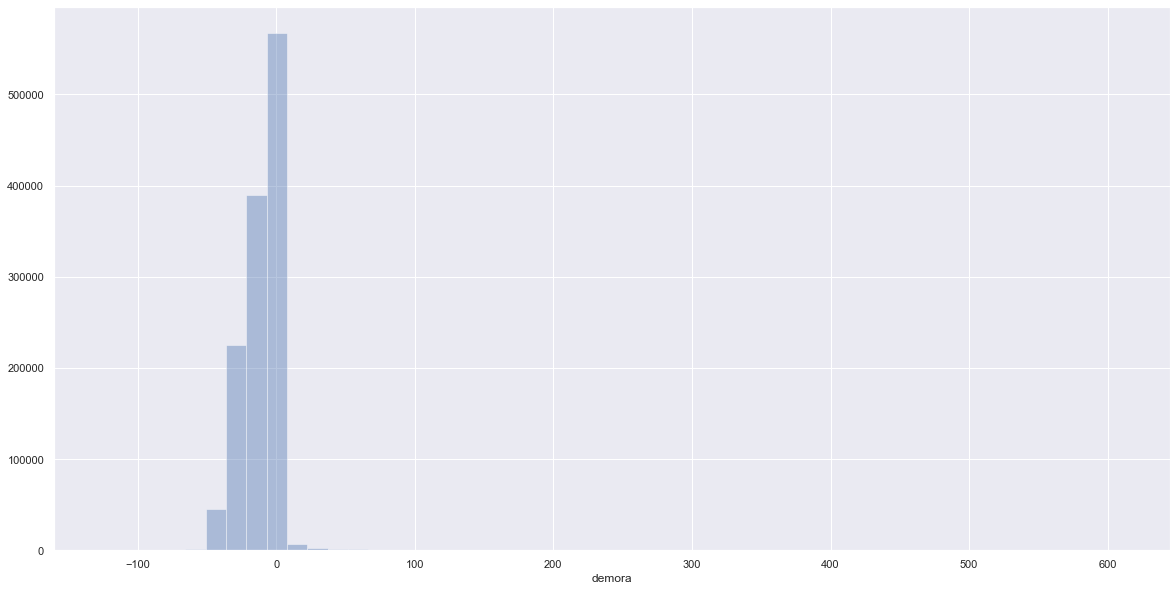

In [137]:
sns.distplot(inai.demora.dropna(), kde=False)

In [146]:
tseries = inai.groupby(['por_mes_sol', 'sector']).agg({'demora':np.mean}).reset_index()

In [154]:
iii.columns = ['por_mes_sol', 'sector']

In [156]:
tseries = iii.merge(tseries, how='left')

In [161]:
tseries['demora'] = tseries.demora.fillna(0)

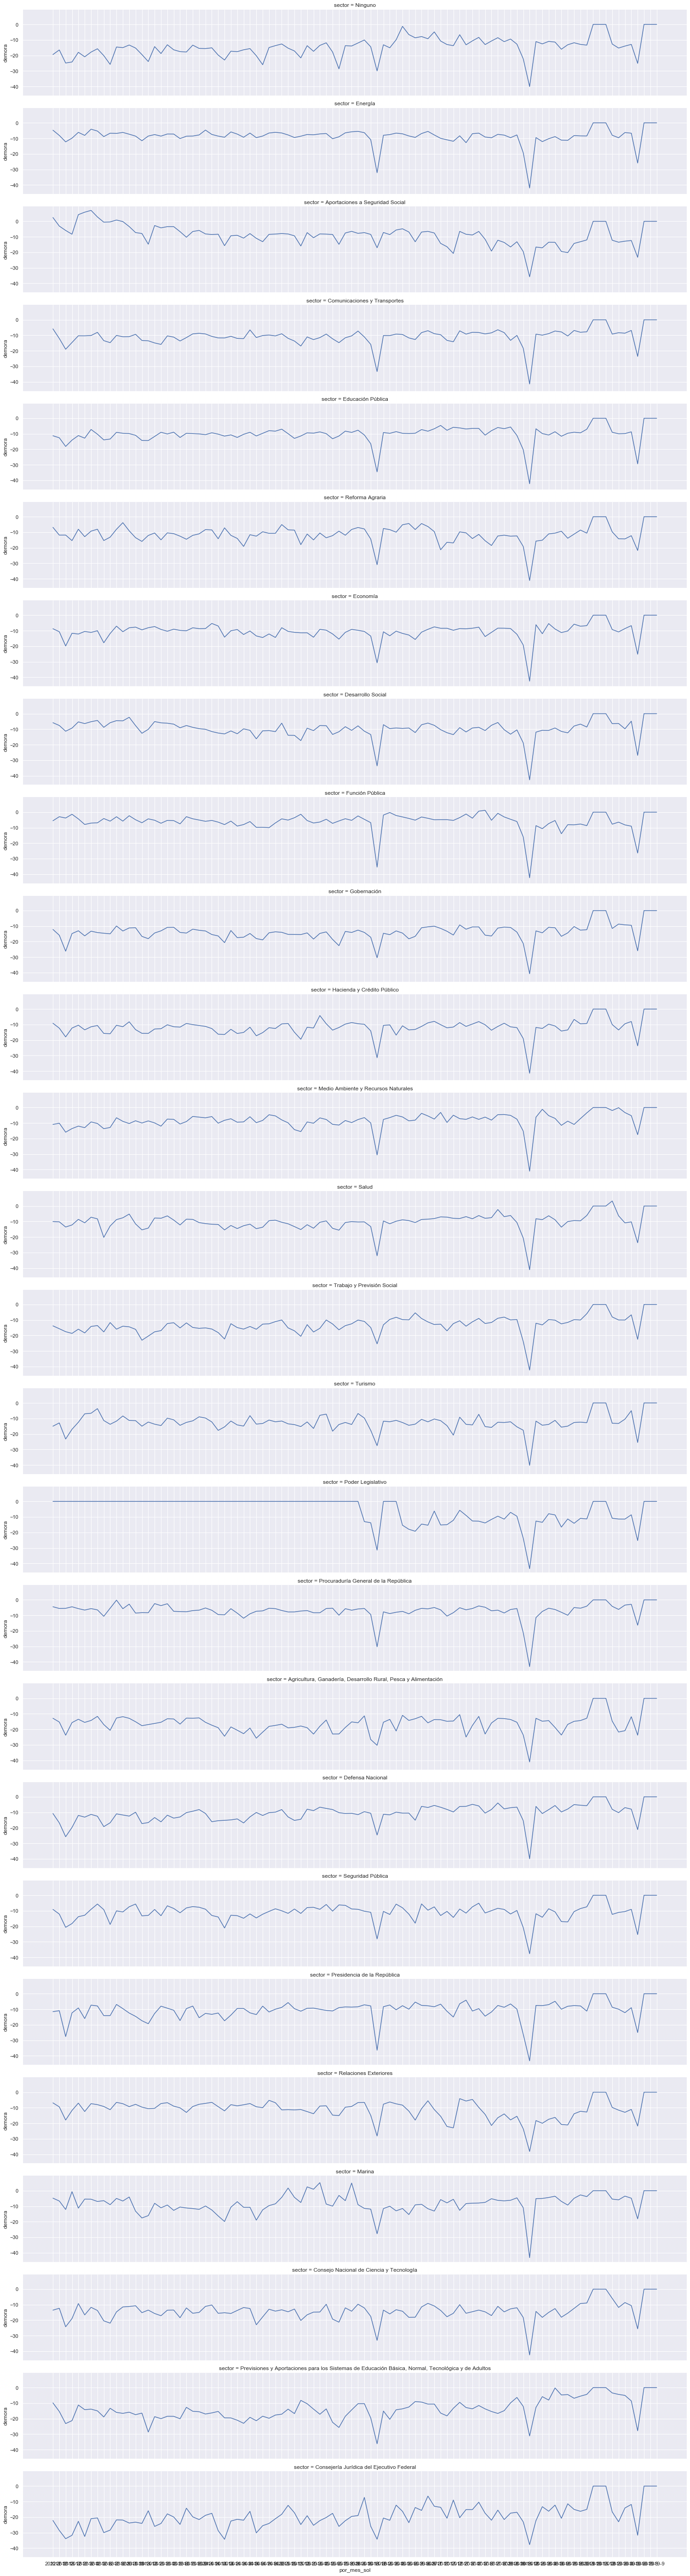

In [162]:
sns.relplot(x='por_mes_sol', y='demora', 
            row='sector', 
            kind='line',
            height = 3,
            aspect = 7,
            data=tseries)